important necessary library and check data information 

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('./onlinefraud.csv')
print(df.head(5))
print(df.info())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0             0.0        0  
1  M2044282225             0.0             0.0        0  
2   C553264065             0.0             0.0        1  
3    C38997010         21182.0             0.0        1  
4  M1230701703             0.0             0.0        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  

 missing values

<Axes: title={'center': 'missing data visualization in the dataset'}>

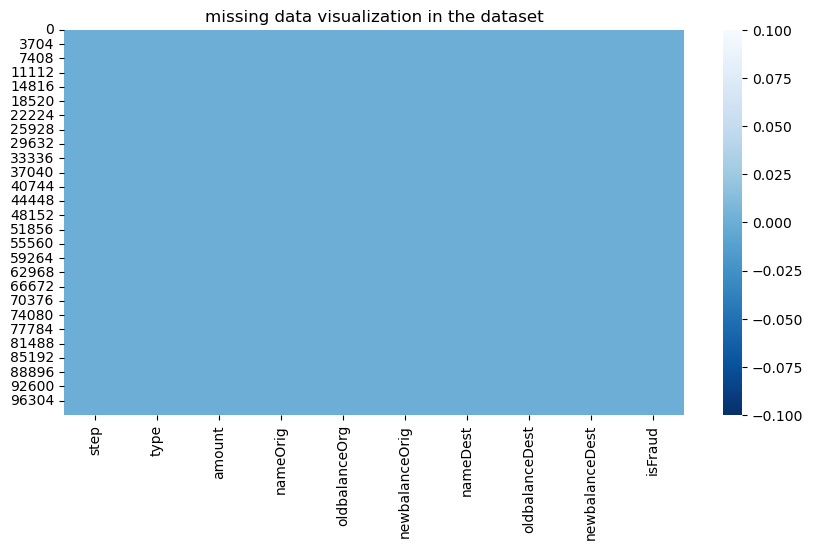

In [31]:
# To visualize the missing values


the sum of null values in each column of a DataFrame
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64
the number of missing values for each column in a DataFrame
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


<Axes: title={'center': 'missing data visualization in the dataset'}>

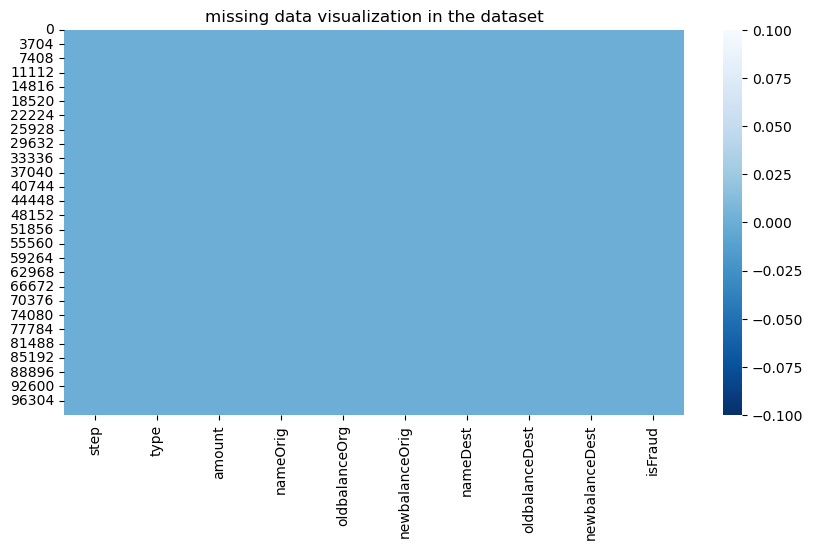

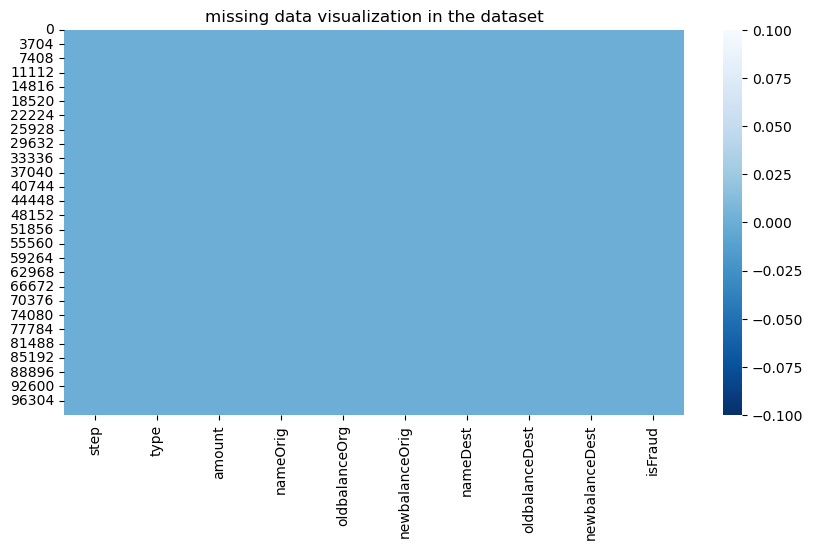

In [45]:

print('the sum of null values in each column of a DataFrame')
print(df.isnull().sum())

plt.figure(figsize = (10,5))
plt.title ("missing data visualization in the dataset")
sns.heatmap(df.isnull(), cbar =True, cmap= "Blues_r")
print('the number of missing values for each column in a DataFrame')
print(df.isna().sum())

plt.figure(figsize = (10,5))
plt.title ("missing data visualization in the dataset")
sns.heatmap(df.isna(), cbar =True, cmap= "Blues_r")

In [33]:
describe_df = df.describe()
print(describe_df.astype(int))
'''

# Reset index to plot the descriptive statistics
describe_df.reset_index(inplace=True)

# Plotting each feature
for column in describe_df.columns[1:]:  # Skip the 'index' column
    plt.figure(figsize=(10, 5))
    sns.barplot(x='index', y=column, data=describe_df)
    plt.title(f'Descriptive Statistics of {column}')
    plt.ylabel('Value for Statistic parameter')
    plt.xlabel('Statistic')
    plt.show()
'''

         step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  100000    100000         100000          100000          100000   
mean        8    173602         877762          894066          880509   
std         1    344300        2673310         2711339         2402306   
min         1         0              0               0               0   
25%         8      9963              0               0               0   
50%         9     52745          20061               0           20839   
75%        10    211763         190192          214813          588272   
max        10  10000000       33800000        34000000        34000000   

       newbalanceDest  isFraud  
count          100000   100000  
mean          1184081        0  
std           2802521        0  
min                 0        0  
25%                 0        0  
50%             49909        0  
75%           1058186        0  
max          38900000        1  


"\n\n# Reset index to plot the descriptive statistics\ndescribe_df.reset_index(inplace=True)\n\n# Plotting each feature\nfor column in describe_df.columns[1:]:  # Skip the 'index' column\n    plt.figure(figsize=(10, 5))\n    sns.barplot(x='index', y=column, data=describe_df)\n    plt.title(f'Descriptive Statistics of {column}')\n    plt.ylabel('Value for Statistic parameter')\n    plt.xlabel('Statistic')\n    plt.show()\n"

In [34]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


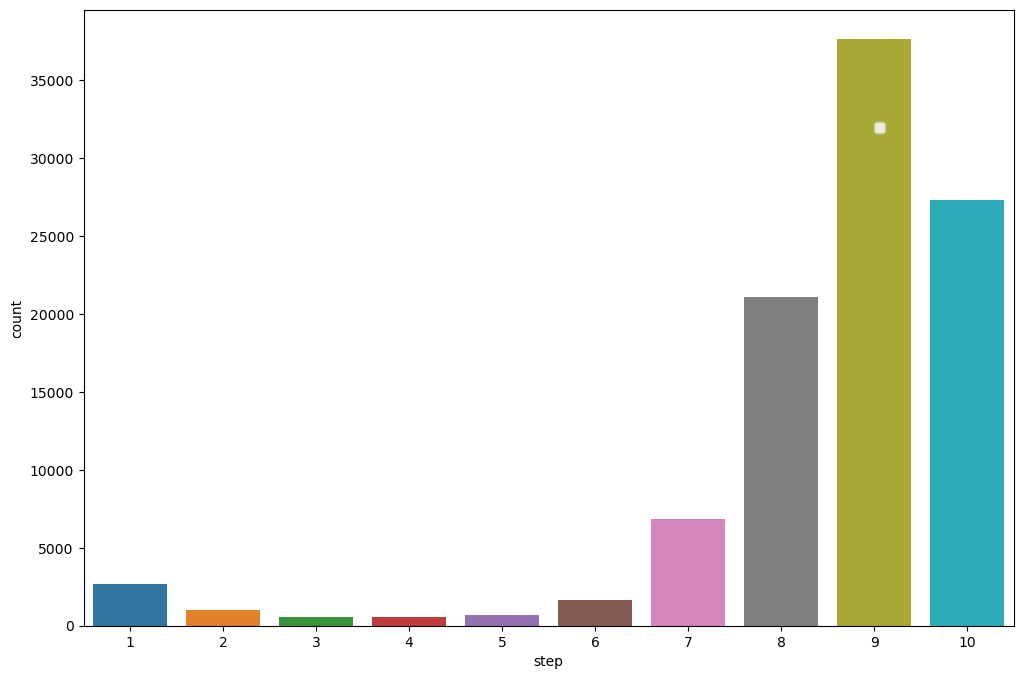

In [35]:

plt.figure(figsize=(12,8))
sns.countplot(x='step',data=df)
plt.legend(loc=[0.85,0.8])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


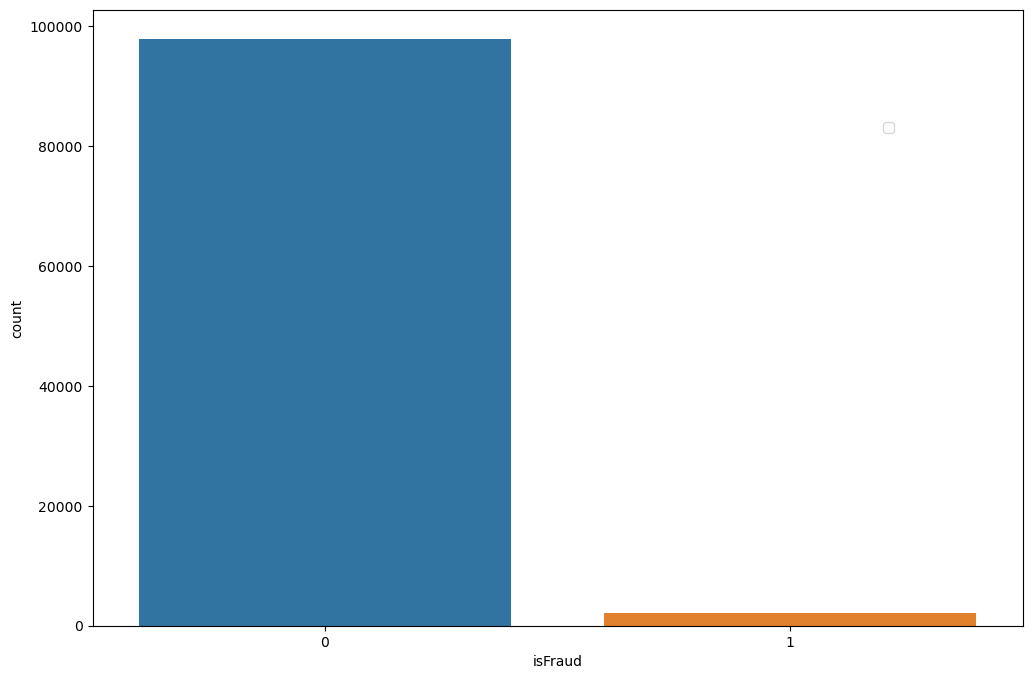

In [36]:
plt.figure(figsize=(12,8))
sns.countplot(x='isFraud',data=df)
plt.legend(loc=[0.85,0.8])

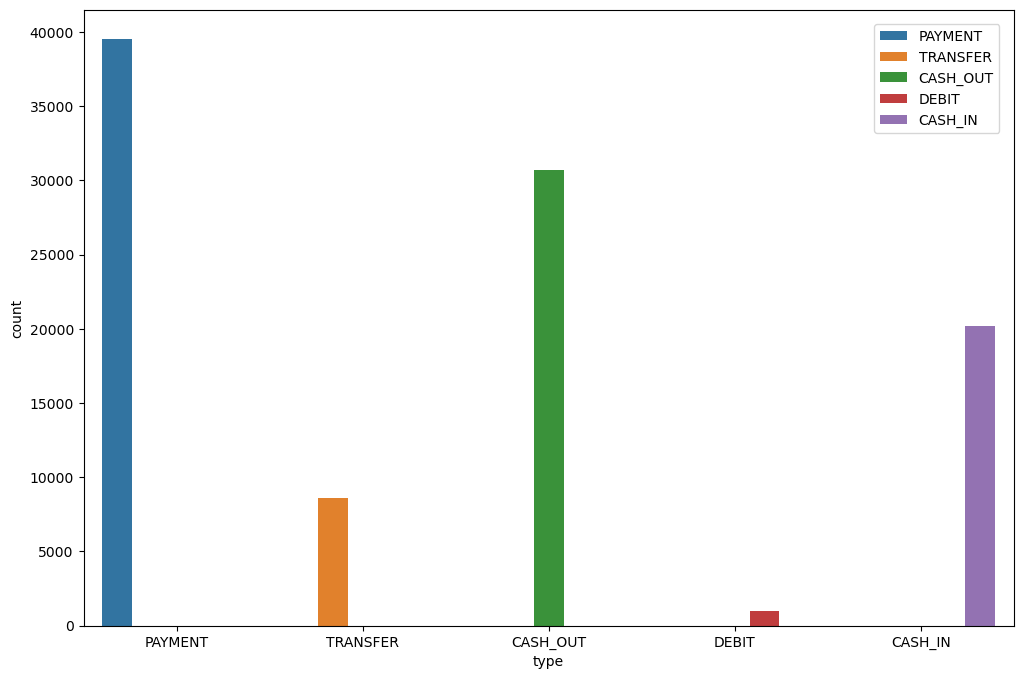

In [37]:

plt.figure(figsize=(12,8))
sns.countplot(x='type',data=df,hue='type')
plt.legend(loc=[0.85,0.8])

<Axes: xlabel='type', ylabel='step'>

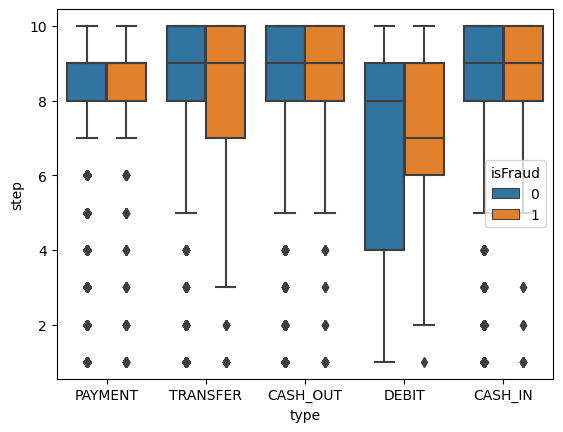

In [38]:
sns.boxplot(x= "type", y= "step", hue ="isFraud", data= df)

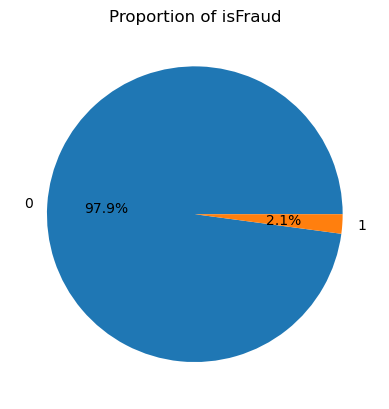

In [39]:
def plot_isFraud_proportion(df):
    """
    Plots a pie chart to show the proportion of isFraud in the given DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to plot the proportion for.
    """
    # Calculate the proportion of isFraud
    proportion = df['isFraud'].value_counts(normalize=True)

    # Create a new figure
    fig, ax = plt.subplots()

    # Plot the pie chart
    ax.pie(proportion, labels=proportion.index, autopct='%1.1f%%')

    # Set the title and show the plot
    ax.set_title('Proportion of isFraud')
    plt.show()
plot_isFraud_proportion(df)

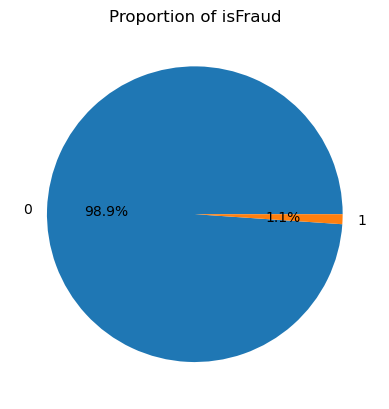

In [62]:
df_froud = df[df['isFraud'] == 1].sample(frac = 1)
df_not_froud= df_2 = df[df['isFraud'] == 0].sample(frac = 1)
leng=int(len(df_froud)/2)
df_train=pd.concat([df_froud.iloc[:leng],df_not_froud.iloc[:leng]])
df_test=pd.concat([
    df_froud.iloc[leng:],df_not_froud.iloc[leng:]
])
plot_isFraud_proportion(df_test)
plt.show()


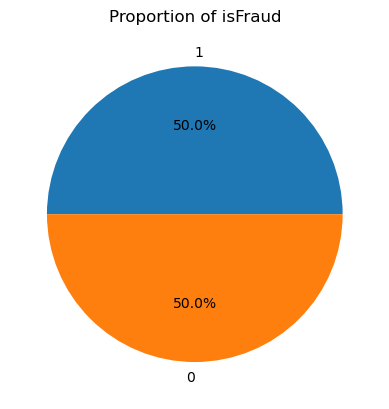

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,2116.000000,2.116000e+03,2.116000e+03,2.116000e+03,2.116000e+03,2.116000e+03,2116.000000
mean,8.435728,1.862125e+05,8.369532e+05,8.400477e+05,8.532685e+05,1.180154e+06,0.500000
std,1.843044,4.379796e+05,2.481044e+06,2.503834e+06,2.399624e+06,2.882336e+06,0.500118
min,1.000000,1.525000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,8.000000,9.941622e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,9.000000,4.747464e+04,2.143250e+04,0.000000e+00,1.066950e+04,2.969753e+04,0.500000
75%,10.000000,2.053595e+05,2.171142e+05,2.270511e+05,5.606990e+05,1.016444e+06,1.000000
max,10.000000,1.000000e+07,2.680000e+07,2.710000e+07,3.170000e+07,3.140000e+07,1.000000


In [64]:
plot_isFraud_proportion(df_train)
plt.show()
df_train.describe()

In [41]:
def label_encoder(df):
    # Remove NaN rows
    df = df.dropna()
    # Find all columns with object dtype
    object_columns = df.select_dtypes(include=['object']).columns
    # Initialize LabelEncoder
    le = LabelEncoder()
    # Apply LabelEncoder to each column with object dtype
    df[object_columns] = df[object_columns].apply(le.fit_transform)
    return df
    

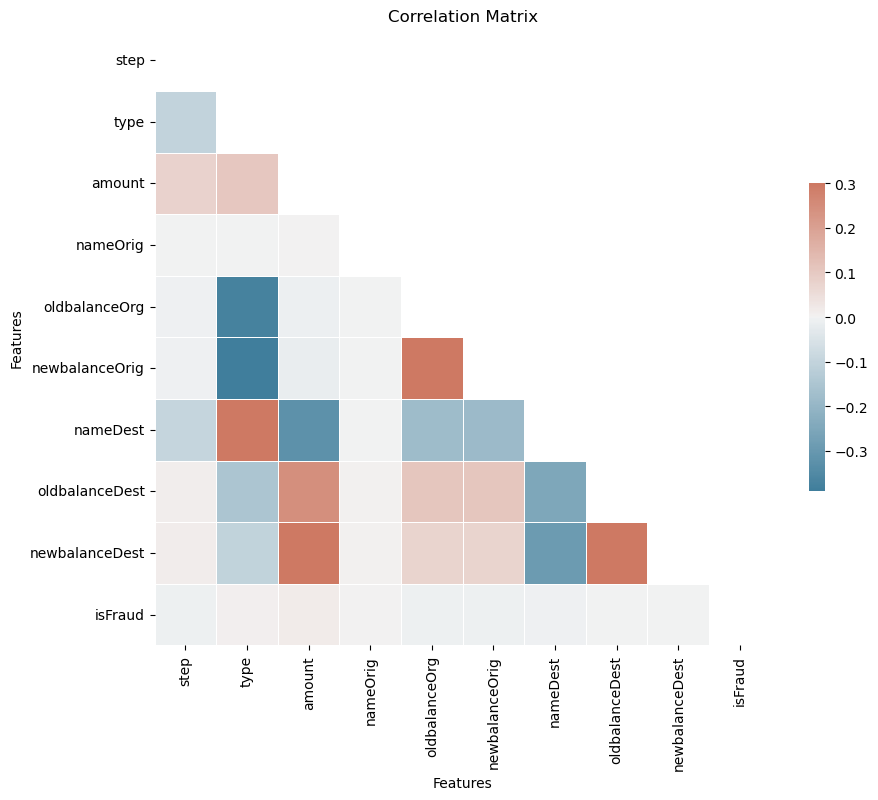

In [42]:

def plot_correlation_matrix(df, figsize=(10, 8)):
    """
    Plots a correlation matrix for the given DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame to plot the correlation matrix for.
        figsize (tuple, optional): The size of the figure. Default is (10, 8).
    """
    # Calculate the correlation matrix
    corr = df.corr()

    # Create a mask for the upper triangle of the correlation matrix
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})

    # Set the title and labels
    plt.title("Correlation Matrix")
    plt.xlabel('Features')
    plt.ylabel('Features')

    # Show the plot
    plt.show()
plot_correlation_matrix(label_encoder(df))

c:\Users\roozu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


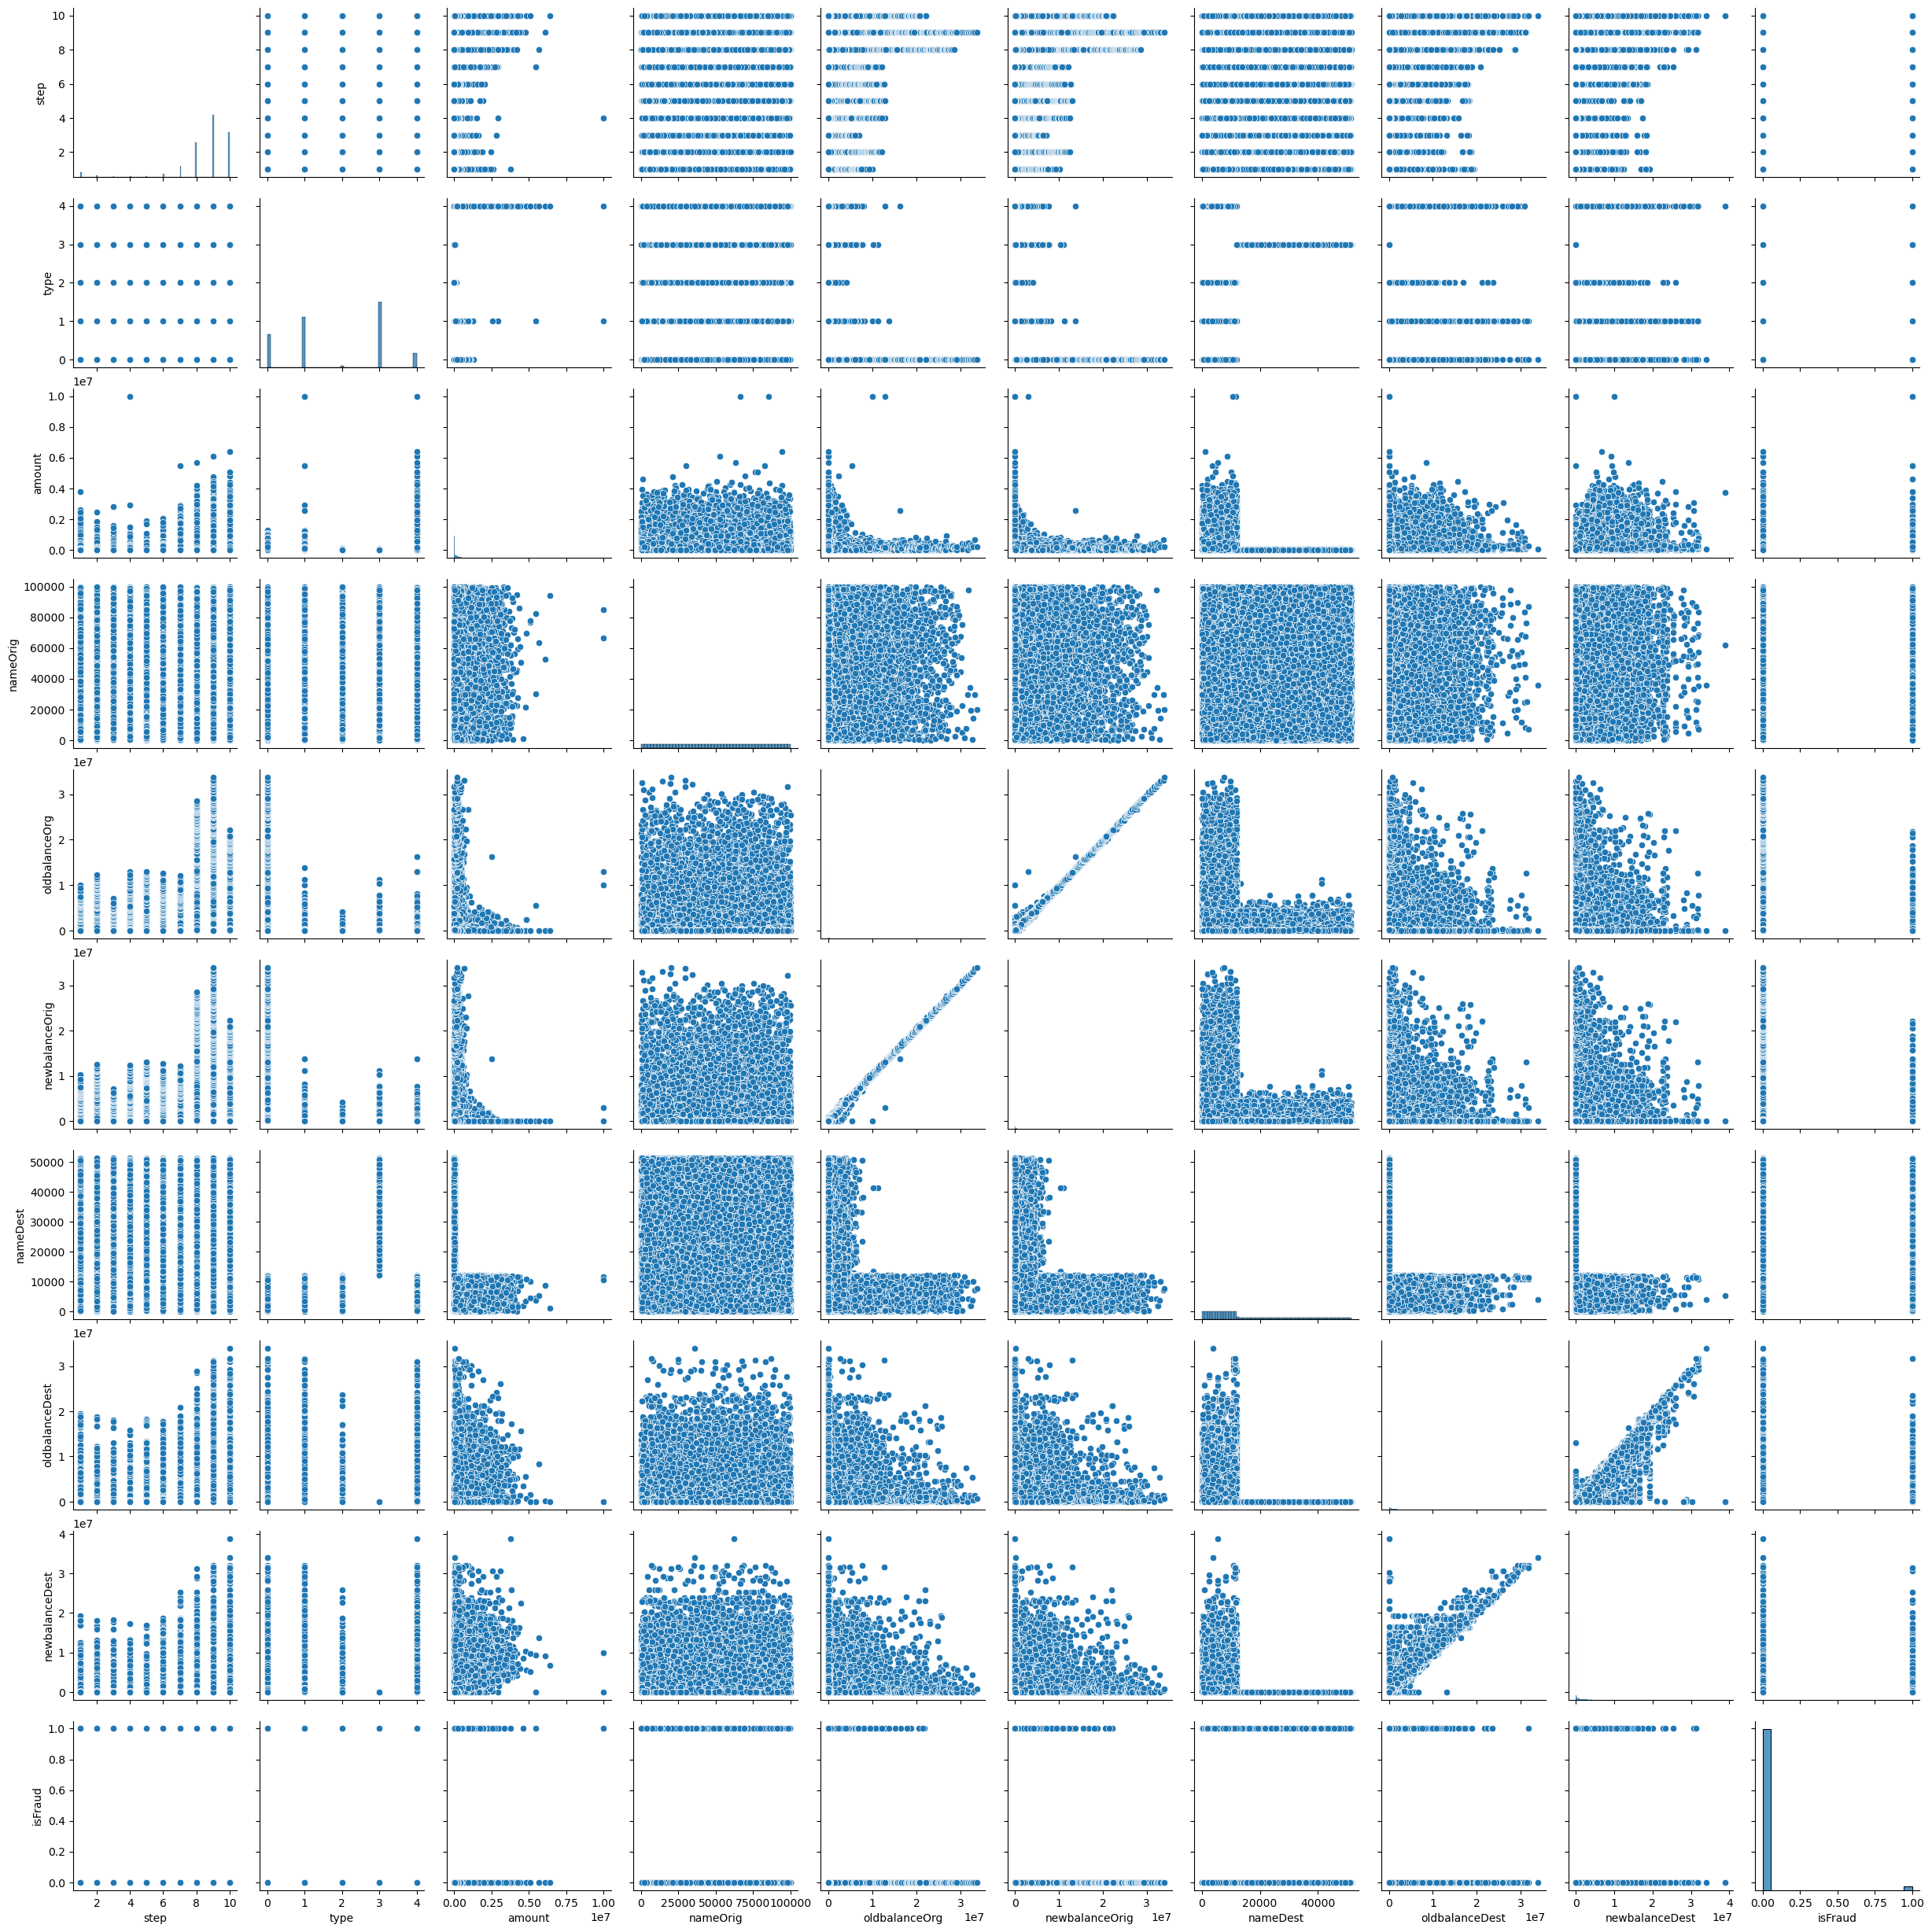

In [43]:
sns.pairplot(label_encoder(df))